In [ ]:
# default_exp gifmap

# Map Gifs

> In this tutorial, the basics of creating map gifs is introduced

This Coding Notebook is the __fourth__ in a series.

An Interactive version can be found here <a href="https://colab.research.google.com/github/karpatic/dataplay/blob/master/notebooks/04_Animated_Map_Change_in_Value_over_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>.


This colab and more can be found on our [webpage](https://karpatic.github.io/dataplay/). 

- Content covered in previous tutorials will be used in later tutorials. 

- __New code and or  information *should* have explanations and or descriptions__ attached. 

- Concepts or code covered in previous tutorials will be used without being explaining in entirety.

- The [Dataplay](https://karpatic.github.io/dataplay/) Handbook development techniques covered in the [Datalabs](https://karpatic.github.io/datalabs/) Guidebook

- __If content can not be found in the current tutorial and is not covered in previous tutorials, please let me know.__

- This notebook has been optimized for Google Colabs ran on a Chrome Browser. 

- Statements found in the index page on view expressed, responsibility, errors and ommissions, use at risk, and licensing  extend throughout the tutorial.

## About this Tutorial: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/karpatic/datalab/master?filepath=%2Fnotebooks%2Findex.ipynb)
[![Binder](https://pete88b.github.io/fastpages/assets/badges/colab.svg)](https://colab.research.google.com/github/karpatic/datalab/blob/master/notebooks/index.ipynb)
[![Binder](https://pete88b.github.io/fastpages/assets/badges/github.svg)](https://github.com/karpatic/datalab/tree/master/notebooks/index.ipynb)
[![Open Source Love svg3](https://badges.frapsoft.com/os/v3/open-source.svg?v=103)](https://github.com/ellerbrock/open-source-badges/)

[![NPM License](https://img.shields.io/npm/l/all-contributors.svg?style=flat)](https://github.com/karpatic/dataplay/blob/master/LICENSE)
[![Active](http://img.shields.io/badge/Status-Active-green.svg)](https://karpatic.github.io) 
[![Python Versions](https://img.shields.io/pypi/pyversions/dataplay.svg)](https://pypi.python.org/pypi/dataplay/)
[![GitHub last commit](https://img.shields.io/github/last-commit/karpatic/dataplay.svg?style=flat)]() 
[![No Maintenance Intended](http://unmaintained.tech/badge.svg)](http://unmaintained.tech/) 

[![GitHub stars](https://img.shields.io/github/stars/karpatic/dataplay.svg?style=social&label=Star)](https://github.com/karpatic/dataplay) 
[![GitHub watchers](https://img.shields.io/github/watchers/karpatic/dataplay.svg?style=social&label=Watch)](https://github.com/karpatic/dataplay) 
[![GitHub forks](https://img.shields.io/github/forks/karpatic/dataplay.svg?style=social&label=Fork)](https://github.com/karpatic/dataplay) 
[![GitHub followers](https://img.shields.io/github/followers/karpatic.svg?style=social&label=Follow)](https://github.com/karpatic/dataplay) 

[![Tweet](https://img.shields.io/twitter/url/https/github.com/karpatic/dataplay.svg?style=social)](https://twitter.com/intent/tweet?text=Check%20out%20this%20%E2%9C%A8%20colab%20by%20@bniajfi%20https://github.com/karpatic/dataplay%20%F0%9F%A4%97) 
[![Twitter Follow](https://img.shields.io/twitter/follow/bniajfi.svg?style=social)](https://twitter.com/bniajfi)

### Whats Inside?

**Description:** This notebook was made to demonstrate how to make a gif map by merging 2 datasets. The first being a dataset containing mappable coordinates onto which the second dataset may mapping its information of interest. 

This lab is split into two sections. 
- The first part of this lab provides help you understand the basics operations.
- The second part of this notebook provides a single python function that handles everything covered in this lab (and more). 

**Input(s):** 
- Dataset (points/ bounds) url
- Points/ bounds geometry column(s)
- Points/ bounds crs's
- Points/ bounds mapping color(s)
- New filename

**Output:** Files, Gif

__*please note__

- This lab in particular makes heavy use of data that is not publicly accessible. Later labs use functions created here on public data. 
- A table of contents is provided in the menu to the left.
- And, that this notebook has been optimized for Google Colabs ran on a Chrome Browser. 
- While still fully usable, non-critical section of code (eg. Python Magics and HTML) may break if used in a different enviornment.

# Guided Walkthrough

## SETUP

### Import Modules

In [1]:
#@title Run This Cell: Install Modules
%%capture
!pip install geopandas
!pip install VitalSigns

In [2]:
#export 
import numpy as np
import pandas as pd

In [ ]:
#hide
t = """ """
!pip install nbdev
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/'Software Development Documents'/dataplay/

# !pip install dataplay

In [ ]:
#export
from dataplay import merge
from dataplay import intaker
from VitalSigns import acsDownload

In [ ]:
# export
#@title Run This Cell: Import Modules

# Once installed we need to import and configure the Widgets
import ipywidgets as widgets
!jupyter nbextension enable --py widgetsnbextension
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Used 4 Importing Data
import urllib.request as urllib
from urllib.parse import urlencode
# This Prevents Timeouts when Importing
import socket
socket.setdefaulttimeout(10.0)

# Pandas Data Manipulation Libraries
import pandas as pd
# Show entire column widths
pd.set_option('display.max_colwidth', -1)
# 4 Working with Json Data
import json
# 4 Data Processing
import numpy as np
# 4 Reading Json Data into Pandas
from pandas.io.json import json_normalize

# 4 exporting data as CSV
import csv

from VitalSigns.acsDownload import retrieve_acs_data

from dataplay.merge import mergeDatasets

from dataplay.geoms import readInGeometryData
from dataplay.geoms import map_points
from dataplay.geoms import workWithGeometryData

# Geo-Formatting
# Postgres-Conversion
import geopandas as gpd
import psycopg2,pandas,numpy
from shapely import wkb
import os
import sys

# In case file is KML
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

# https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2010.html
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2010&layergroup=Census+Tracts

from geopandas import GeoDataFrame

from shapely.wkt import loads
from pandas import ExcelWriter
from pandas import ExcelFile

# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import glob

# Gif
import imageio

# Pictures
from PIL import Image
import requests
from io import BytesIO

### Configure Enviornment

In [8]:
# This will just beautify the output

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.precision', 2)
# pd.reset_option('max_colwidth')
pd.set_option('max_colwidth', 20)
# pd.reset_option('max_colwidth')

### Conveince Functions 

In [9]:
#export
#@title Run This Cell: Misc Function Declarations
# These functions right here are used in the calculations below.
# Finds a column matchings a substring
def getColName  (df, col): return df.columns[df.columns.str.contains(pat = col)][0]
def getColByName (df, col): return df[getColName(df, col)]

# Pulls a column from one dataset into a new dataset.
# This is not a crosswalk. calls getColByName()
def addKey(df, fi, col):
    key = getColName(df, col)
    val = getColByName(df, col)
    fi[key] = val
    return fi
# Return 0 if two specified columns are equal.
def nullIfEqual(df, c1, c2):
    return df.apply(lambda x:
        x[getColName(df, c1)]+x[getColName(df, c2)] if x[getColName(df, c1)]+x[getColName(df, c2)] != 0 else 0, axis=1)
# I'm thinking this doesnt need to be a function..
def sumInts(df): return df.sum(numeric_only=True)

This next function was created in previous colabs. We are going to recycle it for use in this lab

## Retrieve GIS Data

In [10]:
regexMatchingColumnsToMakeTheGifWith = 'hhchpov'

### Import Data of Interest: (HHCHPOV)

In [15]:
# This dataset is taken from the public database provided by BNIAJFI hosted by Esri / ArcGIS
# BNIA ArcGIS Homepage: https://data-bniajfi.opendata.arcgis.com/
final = intaker.Intake.getData("https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/"+regexMatchingColumnsToMakeTheGifWith.capitalize()+"/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson")[['CSA2010', 'hhchpov15', 'hhchpov16', 'hhchpov17', 'hhchpov18', 'hhchpov19', 'geometry']]
final.head(1)

,CSA2010,hhchpov15,hhchpov16,hhchpov17,hhchpov18,hhchpov19,geometry
0,Allendale/Irving...,38.93,34.73,32.77,35.27,32.6,POLYGON ((-76.65...


In [16]:
final.head(1)

,CSA2010,hhchpov15,hhchpov16,hhchpov17,hhchpov18,hhchpov19,geometry
0,Allendale/Irving...,38.93,34.73,32.77,35.27,32.6,POLYGON ((-76.65...


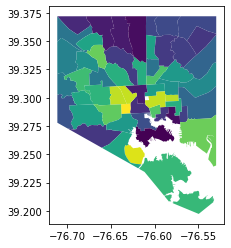

In [17]:
final.plot(column='hhchpov15')

## MAPPING

Fantastic! 

Your data is all together in a single dataset.

now what?

First lets take the centerpoint of each geometry. This will be where we place text on the each geometry.


In [18]:
final['centroid'] = final['geometry'].representative_point()

## Lets make a GIF

In [19]:
pd.set_option('precision', 0)
fileNames = []
labelBounds = True
specialLabelCol = False # Labels on GEOM Centroids
saveGifAs = './test.gif'
label = 'Household Poverty'
annotation = 'Source: Maryland Vital Statistics; Analysis by: Baltimore Neighborhood Indicators Alliance' 
fontsize='22'

Data was successfully merged across all years and geometry.

Now we want the tractname, geometry, and the specific column we want to make a gif from.

In [20]:
# Get only the results tab
td = final.copy()
td = td.reindex(sorted(td.columns), axis=1)

In [21]:
# Coerce columns stored as floats into integers. 
# This will ensure numbers are rounded to whole digits when displaying the reults

gifCols = td.filter(regex=regexMatchingColumnsToMakeTheGifWith).columns.values

td[gifCols] = td[gifCols].fillna(-1)
td[gifCols] = td[gifCols].astype('int32')
td.head()

,CSA2010,centroid,geometry,hhchpov15,hhchpov16,hhchpov17,hhchpov18,hhchpov19
0,Allendale/Irving...,POINT (-76.67653...,POLYGON ((-76.65...,38,34,32,35,32
1,Beechfield/Ten H...,POINT (-76.70331...,POLYGON ((-76.69...,19,21,23,21,15
2,Belair-Edison,POINT (-76.57463...,POLYGON ((-76.56...,36,36,34,39,41
3,Brooklyn/Curtis ...,POINT (-76.56060...,POLYGON ((-76.58...,45,46,46,39,41
4,Canton,POINT (-76.58204...,POLYGON ((-76.57...,5,2,4,4,4


Data exploration is essential! But not covered in this lab.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0fe0c4690>,
      dtype=object)

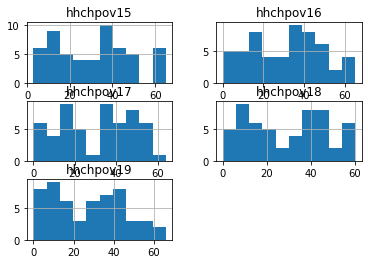

In [22]:
td.filter(regex=regexMatchingColumnsToMakeTheGifWith).hist()

Everything is almost ready to start making our gifmap!

Lets just get the minimum and maximum values so that our color ramp will have consistent values on each picture.

In [23]:
# Get Min Max
mins = []
maxs = []
for col in td.filter(regex=regexMatchingColumnsToMakeTheGifWith).columns:
  mins.append(td[col].min())
  maxs.append(td[col].max())
print(mins, maxs)

# set the min and max range for the choropleth map
vmin, vmax = min(mins), max(maxs)
print('Smallest Value: ', vmin, ', Max Value:', vmax)

[3, 0, 0, 0, 0] [65, 65, 64, 60, 66]
Smallest Value:  0 , Max Value: 66


In [24]:
merged = td.copy()

INDEX 0
Col: hhchpov15


0     Annotation(-76.6...
1     Annotation(-76.7...
2     Annotation(-76.5...
3     Annotation(-76.5...
4     Annotation(-76.5...
5     Annotation(-76.5...
6     Annotation(-76.6...
7     Annotation(-76.6...
8     Annotation(-76.5...
9     Annotation(-76.5...
10    Annotation(-76.6...
11    Annotation(-76.7...
12    Annotation(-76.6...
13    Annotation(-76.6...
14    Annotation(-76.6...
15    Annotation(-76.5...
16    Annotation(-76.6...
17    Annotation(-76.6...
18    Annotation(-76.6...
19    Annotation(-76.6...
20    Annotation(-76.6...
21    Annotation(-76.6...
22    Annotation(-76.6...
23    Annotation(-76.6...
24    Annotation(-76.5...
25    Annotation(-76.5...
26    Annotation(-76.5...
27    Annotation(-76.5...
28    Annotation(-76.7...
29    Annotation(-76.6...
30    Annotation(-76.5...
31    Annotation(-76.5...
32    Annotation(-76.5...
33    Annotation(-76.6...
34    Annotation(-76.6...
35    Annotation(-76.5...
36    Annotation(-76.6...
37    Annotation(-76.6...
38    Annota

(-76.72049409966101, -76.52058984362787, 39.18850298950285, 39.38074613803655)

Text(0.5, 1.0, 'Houshold Childhood Poverty 2015')

Text(0.1, 0.08, 'Source: Maryland Vital Statistics; Analysis by: Baltimore Neighborhood Indicators Alliance')

INDEX 1
Col: hhchpov16


0     Annotation(-76.6...
1     Annotation(-76.7...
2     Annotation(-76.5...
3     Annotation(-76.5...
4     Annotation(-76.5...
5     Annotation(-76.5...
6     Annotation(-76.6...
7     Annotation(-76.6...
8     Annotation(-76.5...
9     Annotation(-76.5...
10    Annotation(-76.6...
11    Annotation(-76.7...
12    Annotation(-76.6...
13    Annotation(-76.6...
14    Annotation(-76.6...
15    Annotation(-76.5...
16    Annotation(-76.6...
17    Annotation(-76.6...
18    Annotation(-76.6...
19    Annotation(-76.6...
20    Annotation(-76.6...
21    Annotation(-76.6...
22    Annotation(-76.6...
23    Annotation(-76.6...
24    Annotation(-76.5...
25    Annotation(-76.5...
26    Annotation(-76.5...
27    Annotation(-76.5...
28    Annotation(-76.7...
29    Annotation(-76.6...
30    Annotation(-76.5...
31    Annotation(-76.5...
32    Annotation(-76.5...
33    Annotation(-76.6...
34    Annotation(-76.6...
35    Annotation(-76.5...
36    Annotation(-76.6...
37    Annotation(-76.6...
38    Annota

(-76.72049409966101, -76.52058984362787, 39.18850298950285, 39.38074613803655)

Text(0.5, 1.0, 'Houshold Childhood Poverty 2016')

Text(0.1, 0.08, 'Source: Maryland Vital Statistics; Analysis by: Baltimore Neighborhood Indicators Alliance')

INDEX 2
Col: hhchpov17


0     Annotation(-76.6...
1     Annotation(-76.7...
2     Annotation(-76.5...
3     Annotation(-76.5...
4     Annotation(-76.5...
5     Annotation(-76.5...
6     Annotation(-76.6...
7     Annotation(-76.6...
8     Annotation(-76.5...
9     Annotation(-76.5...
10    Annotation(-76.6...
11    Annotation(-76.7...
12    Annotation(-76.6...
13    Annotation(-76.6...
14    Annotation(-76.6...
15    Annotation(-76.5...
16    Annotation(-76.6...
17    Annotation(-76.6...
18    Annotation(-76.6...
19    Annotation(-76.6...
20    Annotation(-76.6...
21    Annotation(-76.6...
22    Annotation(-76.6...
23    Annotation(-76.6...
24    Annotation(-76.5...
25    Annotation(-76.5...
26    Annotation(-76.5...
27    Annotation(-76.5...
28    Annotation(-76.7...
29    Annotation(-76.6...
30    Annotation(-76.5...
31    Annotation(-76.5...
32    Annotation(-76.5...
33    Annotation(-76.6...
34    Annotation(-76.6...
35    Annotation(-76.5...
36    Annotation(-76.6...
37    Annotation(-76.6...
38    Annota

(-76.72049409966101, -76.52058984362787, 39.18850298950285, 39.38074613803655)

Text(0.5, 1.0, 'Houshold Childhood Poverty 2017')

Text(0.1, 0.08, 'Source: Maryland Vital Statistics; Analysis by: Baltimore Neighborhood Indicators Alliance')

INDEX 3
Col: hhchpov18


0     Annotation(-76.6...
1     Annotation(-76.7...
2     Annotation(-76.5...
3     Annotation(-76.5...
4     Annotation(-76.5...
5     Annotation(-76.5...
6     Annotation(-76.6...
7     Annotation(-76.6...
8     Annotation(-76.5...
9     Annotation(-76.5...
10    Annotation(-76.6...
11    Annotation(-76.7...
12    Annotation(-76.6...
13    Annotation(-76.6...
14    Annotation(-76.6...
15    Annotation(-76.5...
16    Annotation(-76.6...
17    Annotation(-76.6...
18    Annotation(-76.6...
19    Annotation(-76.6...
20    Annotation(-76.6...
21    Annotation(-76.6...
22    Annotation(-76.6...
23    Annotation(-76.6...
24    Annotation(-76.5...
25    Annotation(-76.5...
26    Annotation(-76.5...
27    Annotation(-76.5...
28    Annotation(-76.7...
29    Annotation(-76.6...
30    Annotation(-76.5...
31    Annotation(-76.5...
32    Annotation(-76.5...
33    Annotation(-76.6...
34    Annotation(-76.6...
35    Annotation(-76.5...
36    Annotation(-76.6...
37    Annotation(-76.6...
38    Annota

(-76.72049409966101, -76.52058984362787, 39.18850298950285, 39.38074613803655)

Text(0.5, 1.0, 'Houshold Childhood Poverty 2018')

Text(0.1, 0.08, 'Source: Maryland Vital Statistics; Analysis by: Baltimore Neighborhood Indicators Alliance')

INDEX 4
Col: hhchpov19


0     Annotation(-76.6...
1     Annotation(-76.7...
2     Annotation(-76.5...
3     Annotation(-76.5...
4     Annotation(-76.5...
5     Annotation(-76.5...
6     Annotation(-76.6...
7     Annotation(-76.6...
8     Annotation(-76.5...
9     Annotation(-76.5...
10    Annotation(-76.6...
11    Annotation(-76.7...
12    Annotation(-76.6...
13    Annotation(-76.6...
14    Annotation(-76.6...
15    Annotation(-76.5...
16    Annotation(-76.6...
17    Annotation(-76.6...
18    Annotation(-76.6...
19    Annotation(-76.6...
20    Annotation(-76.6...
21    Annotation(-76.6...
22    Annotation(-76.6...
23    Annotation(-76.6...
24    Annotation(-76.5...
25    Annotation(-76.5...
26    Annotation(-76.5...
27    Annotation(-76.5...
28    Annotation(-76.7...
29    Annotation(-76.6...
30    Annotation(-76.5...
31    Annotation(-76.5...
32    Annotation(-76.5...
33    Annotation(-76.6...
34    Annotation(-76.6...
35    Annotation(-76.5...
36    Annotation(-76.6...
37    Annotation(-76.6...
38    Annota

(-76.72049409966101, -76.52058984362787, 39.18850298950285, 39.38074613803655)

Text(0.5, 1.0, 'Houshold Childhood Poverty 2019')

Text(0.1, 0.08, 'Source: Maryland Vital Statistics; Analysis by: Baltimore Neighborhood Indicators Alliance')

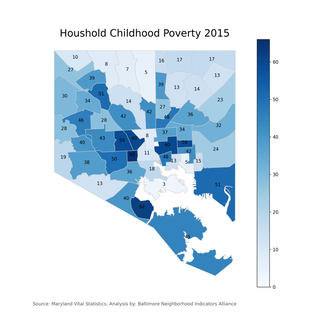

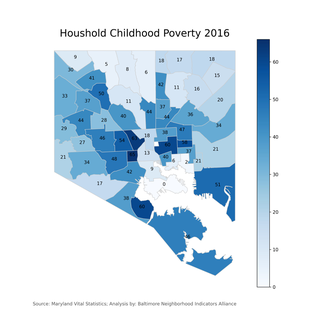

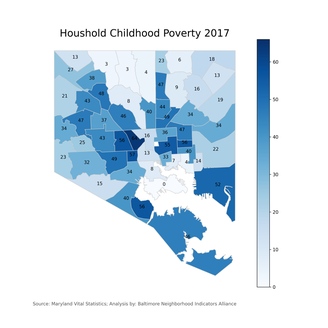

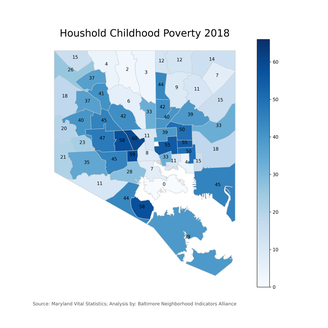

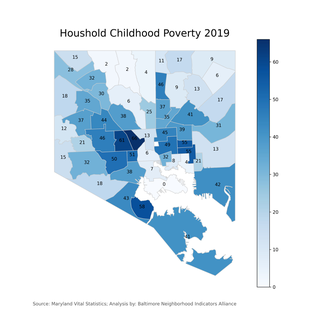

In [25]:
# For each column
for indx, col in enumerate(merged.filter(regex="hhchpov").columns):
    print('INDEX', indx)
    print('Col: '+str(col) )
    image_name = col+'.jpg'
    fileNames.append(image_name)

    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = merged.plot(column=col, cmap='Blues', figsize=(10,10), 
        linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
        legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax) 
    )
    
    # https://stackoverflow.com/questions/38899190/geopandas-label-polygons
    if labelBounds:
      labelColumn = col
      if specialLabelCol: labelColumn = specialLabelCol
      merged.apply(lambda x: fig.annotate(s=x[labelColumn], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
    
    # remove axis off chart and set title
    fig.axis('off')
    fig.set_title(str(col.replace("hhchpov", "Houshold Childhood Poverty 20")), fontdict={'fontsize': fontsize, 'fontweight' : '3'})
    
    # create an annotation for the  data source
    fig.annotate(annotation,
            xy=(0.1, .08), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=10, color='#555555')
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    # filepath = os.path.join(output_path, image_name)
    chart = fig.get_figure()
    # fig.savefig(“map_export.png”, dpi=300)
    chart.savefig(image_name, dpi=300)
    plt.close(chart)
        
images = []
for filename in fileNames:
    images.append(imageio.imread(filename))
imageio.mimsave(saveGifAs, images, fps=.5)


# This will print out a picture of each picture in the gifmap.
from PIL import Image
import requests
from io import BytesIO
for filename in fileNames:
    img = Image.open(filename) 
    size = 328, 328
    img.thumbnail(size, Image.ANTIALIAS)
    img

## Lets make a GIF

# Final Result

In [26]:
# export
import geopandas as gpd
import numpy as np
import pandas as pd
from dataplay import geoms

# Gif
import imageio

# Pictures
from PIL import Image
import requests
from io import BytesIO

In [27]:
# export
def getMinMax(df):
  mins = df.min().values
  maxs = df.max().values
  print("Min&Max: ", mins, maxs)
  return [mins, maxs]

In [28]:
# export
def getAbsMinMax(df):
  # Get Min Max
  mins, maxs = getMinMax(df)
  return [min(mins), max(maxs)]

In [29]:
# export
def createGif(fileNames, saveGifAs, images):
  print("CREATING GIF")
  # This will print out a picture of each picture in the gifmap as well.
  for filename in fileNames:
      # images.append(imageio.imread(filename))
      img = Image.open(filename)
      size = 328, 328
      img.thumbnail(size, Image.ANTIALIAS)
      print(img)
  imageio.mimsave(saveGifAs, images, fps=.5)
  print("GIF CREATED")

In [30]:
# export
def createPicture(df, col, vmin, vmax, labelBounds, title, annotation, fontsize):
    print( '~~~~~~~~~~~~~~~~ \r\n createPicture for: ', 'Col: '+str(col))

    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df.plot(column=col, cmap='Blues', figsize=(10,10),
      linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
      legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )

    if labelBounds:
      if type(True) == type(labelBounds): labelBounds = col
      print('Adding Label: ', labelBounds)
      df.apply(lambda x: fig.annotate(s=x[labelBounds], xy=x['geometry'].centroid.coords[0], ha='center') if x.geometry else False ,axis=1);
    # remove axis off chart and set title
    fig.axis('off')

    print('Setting Title: ', title)
    fig.set_title(str(col.replace("final", title)), fontdict={'fontsize': fontsize, 'fontweight' : '3'})

    print('Setting Data-Source Annotation: ', annotation)
    fig.annotate(annotation, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    # filepath = os.path.join(output_path, image_name)
    print('Get Figure: ')
    chart = fig.get_figure()
    # fig.savefig(“map_export.png”, dpi=300)
    print('Save Figure: ')
    chart.savefig( str(col)+".png" , dpi=300)
    print('Saved & Finished.')
    plt.close(chart)

    return ''

In [31]:
# export
def createGifMap(df, saveGifAs, labelBounds, title, annotation, fontsize):
  # set the min and max range for the choropleth map
  print('createGifMap')
  vmin, vmax = getAbsMinMax( df.filter(regex="final") )

  print('Creating Pictures')
  fileNames = []
  images = []
  # For each column
  for indx, col in enumerate( df.filter( regex="final").columns ):
    createPicture(df, col, vmin, vmax, labelBounds, title, annotation, fontsize)
    print('Adding to images list')
    images.append(imageio.imread(str(col)+".png"))
  print( '~~~~~~~~~~~~~~~~ \r\n Saving images to !')

  createGif(fileNames, saveGifAs, images)

In [32]:
# Our download function will use Baltimore City's tract, county and state as internal paramters
# Change these values in the cell below using different geographic reference codes will change those parameters

# Group By Crosswalked column. Included automatically in final result
# Do Not Group, Include the Crosswalked Column in the final result 
# Create the trav45 Indicator 

state = '24'
county = '510'
tract = '*'
# Specify the download parameters the acs download function will receieve here
year = '19'
years = ['17', '16', '15']
tableId = 'B08303' 
saveAcs = True

# Crosswalk Table 
cwUrl = 'CSA-to-Tract-2010.csv'
cw_left_col = 'tract'
cw_right_col= 'TRACTCE10' 
merge_how= 'CSA2010'
saveCrosswalked = True
crosswalkedFileName = False

groupBy = False # 'CSA2010'
aggMethod = 'sum'
columnsToInclude = ['CSA2010']

finalFileName = './trav45_20'+year+'_tracts_26July2019.csv' 
# Alternatively - groupBy = False & columnsToInclude = ['CSA2010']


# This lower half is to merge to the geom
from dataplay import merge 

# Secondary Table 
right_ds = 'https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson'
right_col ='CSA2010'

interactive = True
merge_how = 'outer'

In [33]:
saveGifAs = './test.gif'
labelBounds = False # 'CSA2010'
annotation = 'Source: Baltimore Neighborhood Indicators Alliance' 
title = 'Indicator Name' 
fontsize='22'

In [ ]:
# Get only the results tab
td = finaldf.filter(regex="final|CSA2010|tract|geometry")
td = td.reindex(sorted(td.columns), axis=1) 